In [1]:
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
from functools import reduce
from time import strptime
import datetime as dt
import seaborn as sns
import pandas as pd
import numpy as np
import calendar
import swifter
import random

## ACLED Data

In [6]:
acled_df = pd.read_csv("../Data/2013-01-01-2018-12-31.csv")

In [7]:
len(acled_df)

407122

In [8]:
acled_df.head(10)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,4576256,454,MAW421,421,31 December 2018,2018,1,Violence against civilians,Attack,Unidentified Armed Group (Malawi),...,Nkhata Bay,-11.6000,34.3000,1,Malawi24,National,"On 31 December, mobs armed with pangas stabbed...",1,1552576417,MWI
1,6664449,360,IDN2296,2296,31 December 2018,2018,1,Protests,Peaceful protest,Protesters (Indonesia),...,Palopo,-3.0148,120.1649,1,Tribunnews,National,"On Dec 31, 2018, a group of students held a pe...",0,1576600008,IDN
2,5180162,8,ALB241,241,31 December 2018,2018,1,Protests,Peaceful protest,Protesters (Albania),...,Tirana,41.3275,19.8189,1,Albanian Daily News,National,"On Dec. 31, 2018: Residents of the Astir neigh...",0,1557848407,ALB
3,6829314,4,AFG15833,15833,31 December 2018,2018,1,Violence against civilians,Attack,Afghan and/or NATO Forces,...,Zurmat,33.4378,69.0277,2,Pajhwok Afghan News,National,"On 31-December-2018, 6 Afghan civilians includ...",6,1580846929,AFG
4,6664450,360,IDN2297,2297,31 December 2018,2018,1,Protests,Peaceful protest,Protesters (Indonesia),...,Teluk Bintan,1.0627,104.4768,1,Tribunnews,National,"On Dec 31, 2018, a group of people held a peac...",0,1576600008,IDN
5,6829315,4,AFG41940,41940,31 December 2018,2018,1,Violence against civilians,Attack,Taliban,...,Qush Tepa,36.0841,65.3879,2,New York Times,International,"On 31 December 2018, 1 civilian was killed fol...",1,1580846929,AFG
6,6873091,887,YEM48000,48000,31 December 2018,2018,1,Battles,Armed clash,Military Forces of Yemen (2016-) Supreme Polit...,...,Al Malahit,16.7685,43.2758,3,Ansar Allah,National,ACLED uses a Yemeni location close to the bord...,1,1582146532,YEM
7,6829316,4,AFG41934,41934,31 December 2018,2018,1,Battles,Armed clash,Taliban,...,Surkh Sang,32.3633,66.7771,1,New York Times,International,"On 31 December 2018, 8 policemen were killed f...",8,1580846929,AFG
8,5628420,804,UKR14332,14332,31 December 2018,2018,2,Strategic developments,Change to group/activity,Military Forces of Ukraine (2014-2019),...,Zhovte,48.6480,39.1119,2,Lugansk Media Centre,Subnational,"As reported on Dec. 31 2018, four IFVs of the ...",0,1563902430,UKR
9,6829317,4,AFG41935,41935,31 December 2018,2018,1,Explosions/Remote violence,Remote explosive/landmine/IED,Unidentified Armed Group (Afghanistan),...,Darqad,37.3841,69.4529,2,New York Times,International,"On 31 December 2018, 1 district police chief w...",1,1580846929,AFG


In [9]:
acled_df.drop(
    ["data_id","iso","event_id_cnty","event_id_no_cnty",\
    "time_precision","actor1","assoc_actor_1","inter1",\
    "actor2","assoc_actor_2","inter2","interaction","region",\
    "admin1","admin2","admin3","geo_precision","source",\
    "source_scale","timestamp"]\
    ,axis = 1,inplace = True)

In [10]:
def get_week_day(date_string):
    date_object = datetime.strptime(date_string, "%d %B %Y")
    return calendar.day_name[(date_object).weekday()]

In [11]:
def get_month(date_string):
    return date_string.split(" ")[1]

In [12]:
acled_df["week_day"] = acled_df["event_date"].swifter.apply(get_week_day)

Pandas Apply: 100%|██████████| 407122/407122 [00:05<00:00, 68020.19it/s]


In [13]:
acled_df["month"] = acled_df["event_date"].swifter.apply(get_month)

Pandas Apply: 100%|██████████| 407122/407122 [00:00<00:00, 818681.03it/s]


In [14]:
acled_df.head(20)

,event_date,year,event_type,sub_event_type,country,location,latitude,longitude,notes,fatalities,iso3,week_day,month
0,31 December 2018,2018,Violence against civilians,Attack,Malawi,Nkhata Bay,-11.6000,34.3000,"On 31 December, mobs armed with pangas stabbed...",1,MWI,Monday,December
1,31 December 2018,2018,Protests,Peaceful protest,Indonesia,Palopo,-3.0148,120.1649,"On Dec 31, 2018, a group of students held a pe...",0,IDN,Monday,December
2,31 December 2018,2018,Protests,Peaceful protest,Albania,Tirana,41.3275,19.8189,"On Dec. 31, 2018: Residents of the Astir neigh...",0,ALB,Monday,December
3,31 December 2018,2018,Violence against civilians,Attack,Afghanistan,Zurmat,33.4378,69.0277,"On 31-December-2018, 6 Afghan civilians includ...",6,AFG,Monday,December
4,31 December 2018,2018,Protests,Peaceful protest,Indonesia,Teluk Bintan,1.0627,104.4768,"On Dec 31, 2018, a group of people held a peac...",0,IDN,Monday,December
5,31 December 2018,2018,Violence against civilians,Attack,Afghanistan,Qush Tepa,36.0841,65.3879,"On 31 December 2018, 1 civilian was killed fol...",1,AFG,Monday,December
6,31 December 2018,2018,Battles,Armed clash,Yemen,Al Malahit,16.7685,43.2758,ACLED uses a Yemeni location close to the bord...,1,YEM,Monday,December
7,31 December 2018,2018,Battles,Armed clash,Afghanistan,Surkh Sang,32.3633,66.7771,"On 31 December 2018, 8 policemen were killed f...",8,AFG,Monday,December
8,31 December 2018,2018,Strategic developments,Change to group/activity,Ukraine,Zhovte,48.6480,39.1119,"As reported on Dec. 31 2018, four IFVs of the ...",0,UKR,Monday,December
9,31 December 2018,2018,Explosions/Remote violence,Remote explosive/landmine/IED,Afghanistan,Darqad,37.3841,69.4529,"On 31 December 2018, 1 district police chief w...",1,AFG,Monday,December


In [16]:
# acled_df.to_csv("Output/acled_data.csv")
# acled_df.to_csv("Output/acled_data.js")

In [17]:
print(len(acled_df["country"].unique()))
country = acled_df["country"].unique()
country.sort()
country

101


array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Armenia',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Benin',
       'Bosnia and Herzegovina', 'Botswana', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic',
       'Chad', 'Croatia', 'Cyprus', 'Democratic Republic of Congo',
       'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Guinea',
       'Guinea-Bissau', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Ivory Coast', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait',
       'Kyrgyzstan', 'Laos', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania',
       'Moldova', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'North Macedonia', 'Oman',
       'Pakistan', 'Palestine', 'Philippines', 'Qatar',
       'Republic of Congo', 'Romania', 

In [18]:
acled_df["sub_event_type"].unique()

array(['Attack', 'Peaceful protest', 'Armed clash',
       'Change to group/activity', 'Remote explosive/landmine/IED',
       'Mob violence', 'Shelling/artillery/missile attack',
       'Sexual violence', 'Violent demonstration',
       'Government regains territory', 'Other',
       'Looting/property destruction', 'Disrupted weapons use',
       'Protest with intervention', 'Non-state actor overtakes territory',
       'Excessive force against protesters', 'Air/drone strike',
       'Agreement', 'Abduction/forced disappearance', 'Grenade',
       'Arrests', 'Non-violent transfer of territory', 'Suicide bomb',
       'Headquarters or base established', 'Chemical weapon'],
      dtype=object)

In [19]:
violent = acled_df.loc[acled_df["event_type"]=='Protests'].reset_index(drop=True)

In [20]:
nig_violent_df = violent.loc[violent["country"]=="Nigeria"].reset_index(drop=True)
nig_violent_df.head(5)

,event_date,year,event_type,sub_event_type,country,location,latitude,longitude,notes,fatalities,iso3,week_day,month
0,26 December 2018,2018,Protests,Peaceful protest,Nigeria,Warri,5.5167,5.7500,26 December. Youth from Warri protested agains...,0,NGA,Wednesday,December
1,20 December 2018,2018,Protests,Peaceful protest,Nigeria,Abuja,9.0833,7.5333,20 December. Youth marched in Abuja demanding ...,0,NGA,Thursday,December
2,19 December 2018,2018,Protests,Peaceful protest,Nigeria,Abuja,9.0833,7.5333,19 December. Ex-militants stormed the main ent...,0,NGA,Wednesday,December
3,18 December 2018,2018,Protests,Peaceful protest,Nigeria,Maiduguri,11.8312,13.1517,18 December. Resident of Maiduguri protested a...,0,NGA,Tuesday,December
4,17 December 2018,2018,Protests,Peaceful protest,Nigeria,Abuja,9.0833,7.5333,17 December. Staff at the National Assembly in...,0,NGA,Monday,December


In [21]:
acled2018_data = acled_df.loc[acled_df["year"]==2018].reset_index(drop=True)

In [22]:
def get_grouped(term):
    grouped = acled2018_data[["country","iso3","event_type"]]\
                .groupby( ["country","iso3","event_type"] ).size().to_frame(name = 'count').reset_index()
    return grouped.loc[grouped["event_type"]==f'{term}'].drop("event_type",axis=1)\
                .rename(columns = {"count":f'{term}'}).reset_index(drop=True)

In [23]:
event_types = list(acled2018_data["event_type"].unique())
event_types

['Violence against civilians',
 'Protests',
 'Battles',
 'Strategic developments',
 'Explosions/Remote violence',
 'Riots']

In [28]:
list_events = [get_grouped(f'{event}') for event in event_types]
merged_df = reduce(lambda x,y: pd.merge(x,y, on = ["country","iso3"]), list_events).\
                rename(columns={"iso3":"country_code",
                                "Violence against civilians":"Human Trafficking Events",
                                "Strategic developments":"development",
                                "Battles":"battles",
                               })
merged_df.head()

,country,country_code,Human Trafficking Events,Protests,battles,development,Explosions/Remote violence,Riots
0,Afghanistan,AFG,332,216,9549,263,3770,10
1,Albania,ALB,1,209,1,2,3,25
2,Algeria,DZA,27,508,16,76,7,67
3,Angola,AGO,19,37,4,7,1,3
4,Armenia,ARM,11,300,1317,15,36,25


In [29]:
a = get_grouped(event_types[0])
merged_df2 = pd.merge(a,get_grouped(event_types[2])).rename(columns={"iso3":"country_code",
                                "Violence against civilians":"Human Trafficking Events",
                                "Battles":"Battles Fought",
                               })
merged_df2.head()

,country,country_code,Human Trafficking Events,Battles Fought
0,Afghanistan,AFG,332,9549
1,Albania,ALB,1,1
2,Algeria,DZA,27,16
3,Angola,AGO,19,4
4,Armenia,ARM,11,1317


In [ ]:
merged_df.to_csv("Output/acled2018_events_type_data.csv")

## Function to parse UNICEF Data

In [30]:
def drop_and_rename(data,value):
    return data[["Geographic Area","Observation Value"]].dropna().\
            rename(columns={"Geographic Area":"country",
                            "Observation Value":f"{value}"})

## Asylum seekers, by country of destination in thousands of persons

In [33]:
asylm_df = pd.read_csv("../Data/GLOBAL_ASYLM_CNTRY_DEST._T._.csv")

In [34]:
# Asylum of seekers by country of destination, observation seekers in thousands
asylm_df = drop_and_rename(asylm_df,"Asylum Seekers")
for index, row in asylm_df.iterrows():
    try:
        if asylm_df.loc[index, "Asylum Seekers"] == "<1":
            asylm_df.loc[index, "Asylum Seekers"] = round(random.random(),2)
    except:
        pass    

In [35]:
asylm_df.head() 

,country,Asylum Seekers
0,Afghanistan,334
1,Albania,19
2,Algeria,6
3,Andorra,0.51
4,Angola,8


## Total population by country in thousands of persons

In [36]:
pop_df = pd.read_csv("../Data/GLOBAL_POP_TOT._2018.csv")
pop_df = drop_and_rename(pop_df,"Population")

In [37]:
pop_df["Population"]=round(pop_df["Population"],2)

In [38]:
pop_df.head()

,country,Population
0,Afghanistan,37171.92
1,Albania,2882.74
2,Algeria,42228.41
3,Andorra,77.01
4,Angola,30809.79


## Estimated number of annual AIDS-related deaths (adolescents and young people aged 15-24 years) in persons

In [40]:
hiv_df = pd.read_csv("../Data/GLOBAL_HIV.csv")
hiv_df = hiv_df.loc[hiv_df["Time Period"] == 2018]
hiv_df = drop_and_rename(hiv_df,"Aids Related Death").reset_index(drop=True)

In [41]:
for index, row in hiv_df.iterrows():
    try:
        if hiv_df.loc[index, "Aids Related Death"] == "<100":
            hiv_df.loc[index, "Aids Related Death"] = round((random.random()+4)*20,2)
        if hiv_df.loc[index, "Aids Related Death"] == "<200":
            hiv_df.loc[index, "Aids Related Death"] = round((random.random()+4)*40,2)
        if hiv_df.loc[index, "Aids Related Death"] == "<500":
            hiv_df.loc[index, "Aids Related Death"] = round((random.random()+4)*100,2)
    except:
        pass

hiv_df.head()

,country,Aids Related Death
0,Afghanistan,86.3
1,Angola,740
2,Argentina,88.41
3,Armenia,83.92
4,Antigua and Barbuda,97.96


## Smoking death by country https://ourworldindata.org/smoking

In [43]:
smoking_death_df = pd.read_csv("../Data/share-deaths-smoking.csv")
smoking_death_df = smoking_death_df.loc[smoking_death_df["Year"]==2017].reset_index(drop=True)
smoking_death_df.rename(columns={"Entity":"country",
                            "Share of deaths from smoking (%)":"Death From Smoking"},inplace=True)
smoking_death_df = smoking_death_df[["country","Death From Smoking"]]
smoking_death_df.head()

,country,Death From Smoking
0,Afghanistan,4.08
1,Africa,3.80
2,Albania,19.11
3,Algeria,11.08
4,American Samoa,9.51


## Global Life Expectancy in Years

In [44]:
life_exp = pd.read_csv("../Data/GLOBAL_LIFE_EXP._T._.csv")
life_exp_df = drop_and_rename(life_exp,"Life Expectancy").reset_index(drop=True)

In [45]:
life_exp_df["Life Expectancy"] = round(life_exp_df["Life Expectancy"],2)

In [46]:
life_exp_df.head()

,country,Life Expectancy
0,Afghanistan,64.49
1,Albania,78.46
2,Algeria,76.69
3,Angola,60.78
4,Antigua and Barbuda,76.89


## Merge everything

In [48]:
new_list_events = [merged_df2,pop_df,asylm_df,hiv_df,life_exp_df,smoking_death_df]
new_merged_df = reduce(lambda x,y: pd.merge(x,y, on = "country"), new_list_events)
new_merged_df

,country,country_code,Human Trafficking Events,Battles Fought,Population,Asylum Seekers,Aids Related Death,Life Expectancy,Death From Smoking
0,Afghanistan,AFG,332,9549,37171.92,334,86.3,64.49,4.08
1,Algeria,DZA,27,16,42228.41,6,89.22,76.69,11.08
2,Angola,AGO,19,4,30809.79,8,740,60.78,4.78
3,Armenia,ARM,11,1317,2951.74,15,83.92,74.94,17.22
4,Bangladesh,BGD,198,68,161376.71,68,96.01,72.32,10.23
5,Benin,BEN,14,3,11485.04,1,165.4,61.47,2.46
6,Bosnia and Herzegovina,BIH,10,1,3323.92,2,83.99,77.26,22.92
7,Burkina Faso,BFA,120,81,19751.47,6,451.83,61.17,1.83
8,Burundi,BDI,658,42,11175.37,60,492.88,61.25,3.34
9,Cambodia,KHM,3,1,16249.79,2,98.82,69.57,12.45


In [47]:
#new_merged_df.to_csv("Output/merge_dataset.csv", index = False)

In [ ]:
merge_dict= new_merged_df.to_dict('records')

In [ ]:
import pymongo
# Initialize PyMongo to work with MongoDBs
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)
# Define database and collection
db = client.merged_data
merged_data = db.merged_data

In [ ]:
merged_data.remove()
merged_data.insert(merge_dict,check_keys=False)

In [ ]:
merge_result = []
result = merged_data.find()
for result in result:
    print(result)
    if '_id' in result:
        del result['_id']
        merge_result.append(result)

In [ ]:
merge_result

In [ ]:
from bson import json_util



json.dumps(merge_result,default=json_util.default)

## Exploratory Data Analysis

In [49]:
new_merged_df["Asylum Seekers"] = pd.to_numeric(new_merged_df["Asylum Seekers"], errors ='ignore')
new_merged_df["Aids Related Death"] = pd.to_numeric(new_merged_df["Aids Related Death"], errors ='ignore')

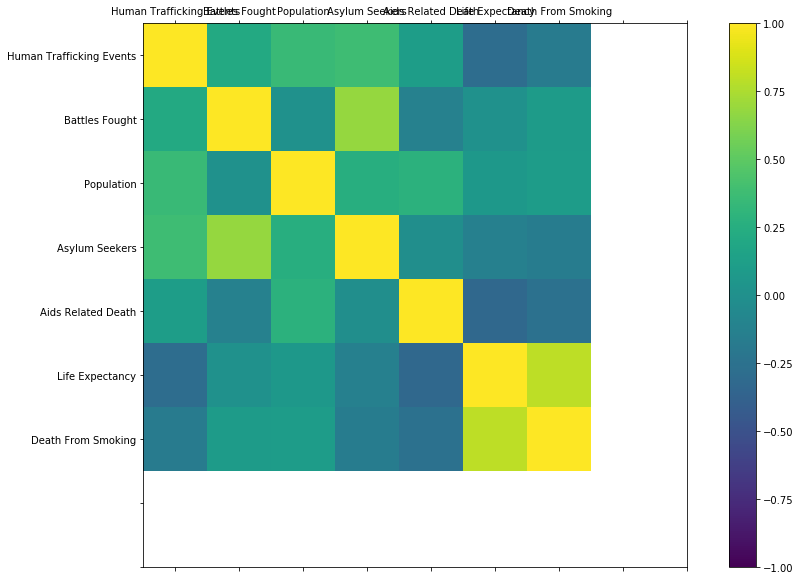

In [50]:
correlations = new_merged_df.drop(["country","country_code"],axis=1).corr()
# plot correlation matrix
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = list( new_merged_df.drop(["country","country_code"],axis=1).columns)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

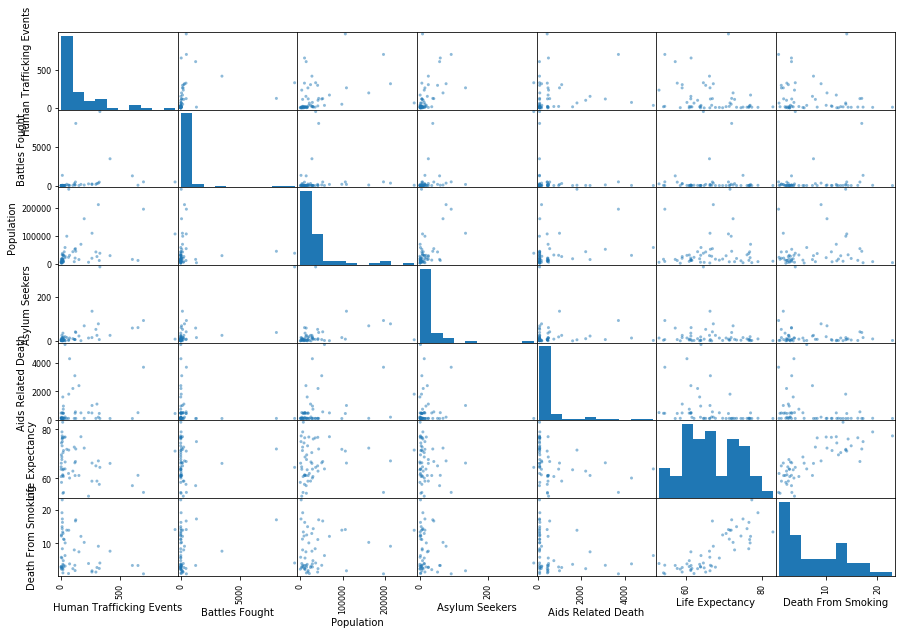

In [51]:
from pandas.plotting import scatter_matrix
scatter_matrix(new_merged_df.drop(["country","country_code"],axis=1),figsize=(15,10))
plt.show()

In [52]:
pov_df = pd.read_csv("../Data/Poverty.csv").dropna().rename(columns= {'Unnamed: 0':'country', 
                                    'Unnamed: 2':'Pop. Below $1.90 per day',
                                    'Unnamed: 3':'Pop. Below $3.20 per day',
                                    'Unnamed: 4':'Pop. Below $5.50 per day'
                                   }).replace("..","NA")[["country","Population below $1.90 a day"]]
pov_df.head()

,country,Population below $1.90 a day
0,Afghanistan,NA
1,Albania,1.7
2,Algeria,0.5
3,American Samoa,NA
4,Andorra,NA


In [56]:
import json
with open("../../Output/normal_cases.json", 'r') as fp:
    normal_data = json.load(fp)
with open("../../Output/special_cases.json", 'r') as fp:
    special_data = json.load(fp)   

In [57]:
country = [list(i.keys())[0].title() for i in normal_data]
intro = [list(i.values())[0][0]['INTRO'] for i in normal_data]
tier = [list(i.values())[0][1]['TIER'] for i in normal_data]
recommendation = []
prosecution = []
protection = []
prevention = []
traffick_profile = []
for i in normal_data:
    try:
        recommendation.append(list(i.values())[0][2]['RECOMMENDATIONS'])
        prosecution.append(list(i.values())[0][3]['PROSECUTIONS'])
        protection.append(list(i.values())[0][4]['PROTECTION'])
        prevention.append(list(i.values())[0][5]['PREVENTION'])
        traffick_profile.append(list(i.values())[0][6]['TRAFFICKING PROFILE'])
    except:
        recommendation.append("NA")
        prosecution.append("NA")
        protection.append("NA")
        prevention.append("NA")
        traffick_profile.append('NA')
        pass
    
special_countries = [list(i.keys())[0].title() for i in special_data]
special_intro = [list(i.values())[0][0]['INTRO'] for i in special_data]
special_tier = [list(i.values())[0][1]['TIER'] for i in special_data]
special_government_effort = [list(i.values())[0][2]['GOVERNMENT EFFORTS'] for i in special_data]
special_traffick_profile = [list(i.values())[0][3]['TRAFFICKING PROFILE'] for i in special_data]

In [58]:
country.extend(special_countries)
intro.extend(special_intro)
tier.extend(special_tier)
recommendation.extend(["NA","NA","NA","NA"])
prosecution.extend(["NA","NA","NA","NA"])
protection.extend(["NA","NA","NA","NA"])
prevention.extend(special_government_effort)
traffick_profile.extend(special_traffick_profile)

In [59]:
tip_report = pd.DataFrame({"country":country,
              "introduction":intro,
              "tier":tier,
              "recommendation":recommendation,
              "prosecution":prosecution,
              "protection":protection,
              "prevention":prevention,
              "traffick_profile":traffick_profile})
tip_report.sort_values(by=['country'], inplace=True)
tip_report.head()

,country,introduction,tier,recommendation,prosecution,protection,prevention,traffick_profile
0,Afghanistan,The Government of Afghanistan does not fully m...,TIER 2,Cease the unlawful recruitment and use of chil...,The government increased its overall law enfor...,The government increased efforts to identify v...,The government increased its trafficking prev...,"As reported over the past five years, Afghanis..."
1,Albania,The Government of Albania does not fully meet ...,TIER 2,Implement the law that exempts victims from pe...,The government decreased law enforcement effor...,The government maintained victim protection ef...,The government increased efforts to prevent tr...,"As reported over the past five years, Albania ..."
2,Algeria,The Government of Algeria does not fully meet ...,TIER 2 WATCH LIST,Implement the 2016 presidential decree requiri...,The government increased efforts to investigat...,The government maintained protection efforts. ...,The government increased efforts to prevent hu...,"As reported over the past five years, Algeria ..."
3,Angola,The Government of Angola does not fully meet t...,TIER 2 WATCH LIST,Increase investigations and prosecution of for...,The government made mixed law enforcement effo...,The government decreased protection efforts. A...,The government maintained its efforts to preve...,"As reported over the past five years, Angola i..."
4,Antigua And Barbuda,The Government of Antigua and Barbuda does not...,TIER 2,Vigorously investigate and prosecute cases of ...,The government increased prosecution efforts. ...,The government increased protection efforts. ...,The government increased prevention efforts. A...,"As reported over the past five years, Antigua ..."


In [60]:
acled2018vio_data = acled2018_data.loc[acled2018_data["event_type"]=="Violence against civilians"]
acled2018vio_data.head()

,event_date,year,event_type,sub_event_type,country,location,latitude,longitude,notes,fatalities,iso3,week_day,month
0,31 December 2018,2018,Violence against civilians,Attack,Malawi,Nkhata Bay,-11.6000,34.3000,"On 31 December, mobs armed with pangas stabbed...",1,MWI,Monday,December
3,31 December 2018,2018,Violence against civilians,Attack,Afghanistan,Zurmat,33.4378,69.0277,"On 31-December-2018, 6 Afghan civilians includ...",6,AFG,Monday,December
5,31 December 2018,2018,Violence against civilians,Attack,Afghanistan,Qush Tepa,36.0841,65.3879,"On 31 December 2018, 1 civilian was killed fol...",1,AFG,Monday,December
29,31 December 2018,2018,Violence against civilians,Sexual violence,Egypt,Monshaat Al Fayoum,29.2921,30.8463,"On Dec 31 (or around), a prisoner allegedly di...",1,EGY,Monday,December
38,31 December 2018,2018,Violence against civilians,Attack,Niger,Woulouwa,13.4974,12.8167,"On December 31, gendarmes opened fire against ...",0,NER,Monday,December


In [61]:
week_group = acled2018vio_data[["country","iso3","event_type","location","latitude","longitude","notes","fatalities","week_day","month"]]\
                .groupby( ["country","week_day"] ).size().to_frame(name = 'count').reset_index()
week_group = week_group.pivot(index='country', columns='week_day', values='count').fillna(0)
week_group = week_group[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

In [62]:
week_group.head() 

week_day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
country,,,,,,,
Afghanistan,53.0,56.0,42.0,38.0,46.0,54.0,43.0
Albania,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Algeria,3.0,5.0,2.0,5.0,5.0,3.0,4.0
Angola,3.0,0.0,3.0,3.0,6.0,2.0,2.0
Armenia,1.0,2.0,1.0,3.0,0.0,2.0,2.0


In [63]:
month_group = acled2018vio_data[["country","iso3","event_type","location","latitude","longitude","notes","fatalities","week_day","month"]]\
                .groupby( ["country","month"] ).size().to_frame(name = 'count').reset_index()
month_group = month_group.pivot(index='country', columns='month', values='count').fillna(0)
month_group = month_group[["January","February","March","April","May","June","July","August","September","October","November","December"]]
month_group.head()


month,January,February,March,April,May,June,July,August,September,October,November,December
country,,,,,,,,,,,,
Afghanistan,38.0,26.0,16.0,22.0,34.0,37.0,42.0,41.0,22.0,24.0,23.0,7.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Algeria,1.0,1.0,1.0,1.0,2.0,5.0,0.0,3.0,1.0,1.0,7.0,4.0
Angola,0.0,0.0,0.0,3.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0
Armenia,0.0,0.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0


In [64]:
acled2018vio_data.head()

,event_date,year,event_type,sub_event_type,country,location,latitude,longitude,notes,fatalities,iso3,week_day,month
0,31 December 2018,2018,Violence against civilians,Attack,Malawi,Nkhata Bay,-11.6000,34.3000,"On 31 December, mobs armed with pangas stabbed...",1,MWI,Monday,December
3,31 December 2018,2018,Violence against civilians,Attack,Afghanistan,Zurmat,33.4378,69.0277,"On 31-December-2018, 6 Afghan civilians includ...",6,AFG,Monday,December
5,31 December 2018,2018,Violence against civilians,Attack,Afghanistan,Qush Tepa,36.0841,65.3879,"On 31 December 2018, 1 civilian was killed fol...",1,AFG,Monday,December
29,31 December 2018,2018,Violence against civilians,Sexual violence,Egypt,Monshaat Al Fayoum,29.2921,30.8463,"On Dec 31 (or around), a prisoner allegedly di...",1,EGY,Monday,December
38,31 December 2018,2018,Violence against civilians,Attack,Niger,Woulouwa,13.4974,12.8167,"On December 31, gendarmes opened fire against ...",0,NER,Monday,December


In [65]:
listEvents = [get_grouped(event_types[0]),pop_df,asylm_df,life_exp_df,pov_df,tip_report,week_group,month_group]
complete_df = reduce(lambda x,y: pd.merge(x,y, on = "country"), listEvents)
complete_df.head()

,country,iso3,Violence against civilians,Population,Asylum Seekers,Life Expectancy,Population below $1.90 a day,introduction,tier,recommendation,...,March,April,May,June,July,August,September,October,November,December
0,Afghanistan,AFG,332,37171.92,334,64.49,NA,The Government of Afghanistan does not fully m...,TIER 2,Cease the unlawful recruitment and use of chil...,...,16.0,22.0,34.0,37.0,42.0,41.0,22.0,24.0,23.0,7.0
1,Albania,ALB,1,2882.74,19,78.46,1.7,The Government of Albania does not fully meet ...,TIER 2,Implement the law that exempts victims from pe...,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Algeria,DZA,27,42228.41,6,76.69,0.5,The Government of Algeria does not fully meet ...,TIER 2 WATCH LIST,Implement the 2016 presidential decree requiri...,...,1.0,1.0,2.0,5.0,0.0,3.0,1.0,1.0,7.0,4.0
3,Angola,AGO,19,30809.79,8,60.78,30.1,The Government of Angola does not fully meet t...,TIER 2 WATCH LIST,Increase investigations and prosecution of for...,...,0.0,3.0,0.0,1.0,2.0,1.0,2.0,4.0,2.0,4.0
4,Armenia,ARM,11,2951.74,15,74.94,1.4,The Government of Armenia does not fully meet ...,TIER 2,"Vigorously investigate, prosecute, and convict...",...,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,1.0


In [66]:
def get_notes(country):
    a = acled2018vio_data.loc[acled2018vio_data["country"]==f"{country}"]
    notes = a["notes"].tolist()
    location=a["location"].tolist()
    latitude=[str(i) for i in a["latitude"].tolist()]
    longitude = [str(i) for i in a["longitude"].tolist()]
    fatalities = [str(i) for i in a["fatalities"].tolist()]
    return [" ".join(notes),"  ".join(location),"  ".join(latitude),"  ".join(longitude),"  ".join(fatalities)]

In [67]:
complete_df["notes"] = " "
complete_df["location"] = " "
complete_df["latitude"] = " "
complete_df["longitude"] = " "
complete_df["fatalities"] = " "
for index, row in complete_df.iterrows():
    try:
        complete_df.loc[index, "notes"] = get_notes(complete_df.loc[index, "country"])[0]
        complete_df.loc[index, "location"] = get_notes(complete_df.loc[index, "country"])[1]
        complete_df.loc[index, "latitude"] = get_notes(complete_df.loc[index, "country"])[2]
        complete_df.loc[index, "longitude"] = get_notes(complete_df.loc[index, "country"])[3]
        complete_df.loc[index, "fatalities"] = get_notes(complete_df.loc[index, "country"])[4]
    except:
        pass

In [68]:
complete_df = complete_df.set_index("country")
complete_df.head(3)

,iso3,Violence against civilians,Population,Asylum Seekers,Life Expectancy,Population below $1.90 a day,introduction,tier,recommendation,prosecution,...,August,September,October,November,December,notes,location,latitude,longitude,fatalities
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AFG,332,37171.92,334,64.49,NA,The Government of Afghanistan does not fully m...,TIER 2,Cease the unlawful recruitment and use of chil...,The government increased its overall law enfor...,...,41.0,22.0,24.0,23.0,7.0,"On 31-December-2018, 6 Afghan civilians includ...",Zurmat Qush Tepa Dashti Qala Balkh Jalalab...,33.4378 36.0841 37.2216 36.7564 34.4265 3...,69.0277 65.3879 69.4975 66.8972 70.4515 6...,6 1 1 4 1 0 12 0 1 3 0 3 4 0 0 ...
Albania,ALB,1,2882.74,19,78.46,1.7,The Government of Albania does not fully meet ...,TIER 2,Implement the law that exempts victims from pe...,The government decreased law enforcement effor...,...,1.0,0.0,0.0,0.0,0.0,"On August 30, 2018: Unidentified attacker shot...",Tirana,41.3275,19.8189,0
Algeria,DZA,27,42228.41,6,76.69,0.5,The Government of Algeria does not fully meet ...,TIER 2 WATCH LIST,Implement the 2016 presidential decree requiri...,The government increased efforts to investigat...,...,3.0,1.0,1.0,7.0,4.0,"On 14 December, a man who broke through a gend...",El Oued Chlef Bordj Menaiel Sougueur Oran ...,33.3561 36.1653 36.7433 35.1857 35.6911 3...,6.8632 1.3345 3.7173 1.4961 -0.6417 5.083...,1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0...


In [69]:
complete_dict = complete_df.T.to_dict()
b = list(complete_dict.values())
for i in range(len(b)):
    b[i]["location"] = b[i]["location"].split("  ")
    b[i]["latitude"] = b[i]["latitude"].split("  ")
    b[i]["longitude"] = b[i]["longitude"].split("  ")
    b[i]["fatalities"] = b[i]["fatalities"].split("  ")

In [70]:
new_complete_df = pd.DataFrame(complete_dict).T
new_complete_df

,April,Asylum Seekers,August,December,February,Friday,January,July,June,Life Expectancy,...,latitude,location,longitude,notes,prevention,prosecution,protection,recommendation,tier,traffick_profile
Afghanistan,22,334,41,7,26,46,38,42,37,64.49,...,"[33.4378, 36.0841, 37.2216, 36.7564, 34.4265, ...","[Zurmat, Qush Tepa, Dashti Qala, Balkh, Jalala...","[69.0277, 65.3879, 69.4975, 66.8972, 70.4515, ...","On 31-December-2018, 6 Afghan civilians includ...",The government increased its trafficking prev...,The government increased its overall law enfor...,The government increased efforts to identify v...,Cease the unlawful recruitment and use of chil...,TIER 2,"As reported over the past five years, Afghanis..."
Albania,0,19,1,0,0,0,0,0,0,78.46,...,[41.3275],[Tirana],[19.8189],"On August 30, 2018: Unidentified attacker shot...",The government increased efforts to prevent tr...,The government decreased law enforcement effor...,The government maintained victim protection ef...,Implement the law that exempts victims from pe...,TIER 2,"As reported over the past five years, Albania ..."
Algeria,1,6,3,4,1,5,1,0,5,76.69,...,"[33.3561, 36.1653, 36.7433, 35.1857, 35.6911, ...","[El Oued, Chlef, Bordj Menaiel, Sougueur, Oran...","[6.8632, 1.3345, 3.7173, 1.4961, -0.6417, 5.08...","On 14 December, a man who broke through a gend...",The government increased efforts to prevent hu...,The government increased efforts to investigat...,The government maintained protection efforts. ...,Implement the 2016 presidential decree requiri...,TIER 2 WATCH LIST,"As reported over the past five years, Algeria ..."
Angola,3,8,1,4,0,6,0,2,1,60.78,...,"[-15.1961, -15.1961, -8.8383, -8.8383, -8.78, ...","[Mocamades, Mocamades, Luanda, Luanda, Cafunfo...","[12.1522, 12.1522, 13.2344, 13.2344, 17.99, 13...","On Dec 24, a fisherman was killed by a policem...",The government maintained its efforts to preve...,The government made mixed law enforcement effo...,The government decreased protection efforts. A...,Increase investigations and prosecution of for...,TIER 2 WATCH LIST,"As reported over the past five years, Angola i..."
Armenia,4,15,3,1,0,0,0,0,0,74.94,...,"[40.7847, 40.1811, 40.5484, 40.1811, 40.7847, ...","[Gyumri, Yerevan, Sevan, Yerevan, Gyumri, Dzor...","[43.8416, 44.5136, 44.9487, 44.5136, 43.8416, ...","On 3 December, a female citizen of Gyumri died...",The government maintained prevention efforts. ...,The government decreased law enforcement effor...,The government decreased protection efforts. T...,"Vigorously investigate, prosecute, and convict...",TIER 2,"Armenia is a source and, to a lesser extent, d..."
Azerbaijan,1,10,0,0,1,2,1,1,1,72.86,...,"[41.0929, 40.6775, 39.8246, 40.0701, 39.9743, ...","[Gazakh, Ganja, Stepanakert, Cemenli, Qiyamadd...","[45.3709, 46.3582, 46.7535, 47.0418, 47.1124, ...","On 25 September, Teimur Akhundov, a resident o...",The government maintained prevention efforts. ...,The government maintained law enforcement effo...,The government maintained victim protection ef...,Vigorously investigate and prosecute trafficki...,TIER 2,"As reported over the past five years, Azerbaij..."
Bahrain,0,0.8,0,0,0,0,0,0,0,77.16,...,"[26.2111, 26.0828, 26.1156, 26.1619, 26.2279]","[Manama-Juffair, Sadad, Karzakkan, Aali, Manama]","[50.6011, 50.4897, 50.4819, 50.5164, 50.5857]",Security forces reportedly raided the home of ...,The government increased efforts to prevent tr...,The government increased its law enforcement e...,The government increased efforts to protect vi...,"Increase efforts to investigate, prosecute, an...",TIER 1,"As reported over the past five years, Bahrain ..."
Bangladesh,3,68,24,62,3,30,4,14,8,72.32,...,"[22.3571, 22.6493, 23.9746, 22.9443, 24.0414, ...","[Chittagong, Subarnachar, Brahmanbaria, Lakshm...","[91.7823, 91.0615, 91.1123, 90.8301, 90.7374, ...","On Dec 31, two members of Bangladesh Chhatra L...",The government maintained efforts to prevent t...,The government maintained anti-trafficking la...,The government maintaine

In [ ]:
new_complete_df.to_csv("Output/Complete_dataset.csv")
new_complete_df.T.to_json("Output/Complete_dataset.json")